In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# <font color = blue> IMDb Movie Analysis </font>

Here, we have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this project, we will try to find some interesting insights into these movies and their voters.

## 1) Reading the data

### 1.1: Read the Movies Data

In [3]:
# Reading the csv file
movies = pd.read_csv("Movie+Assignment+Data.csv")
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


### 1.2: Inspect the Dataframe

Inspecting the dataframe for dimensions, null-values and summary of different numeric columns.

In [4]:
# Number of rows and columns in the dataframe
movies.shape

(100, 62)

Evidently, we have 100 rows and 62 columns.

In [5]:
# Column-wise info of the dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [6]:
# Summary for the numeric columns 
movies.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


As we can see here, the values are in the format which is not very easily readable and understandable. Hence, we will change the 
format of the float values and read run the above code.

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

In [8]:
movies.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.00,100.00,100.00,100.00,99.00,98.00,100.00,95.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,"2,012.82","78,384,000.00","146,867,867.24","13,407.27","7,377.30","3,002.15",7.88,78.25,126.42,"73,212.16",...,7.98,7.73,7.72,7.78,7.65,7.62,7.77,7.27,7.96,7.79
std,1.92,"74,452,947.27","145,400,370.13","10,649.04","13,471.57","6,940.30",0.25,9.12,19.05,"82,669.59",...,0.32,0.25,0.26,0.28,0.21,0.21,0.30,0.36,0.23,0.26
min,"2,010.00","3,000,000.00","223,838.00",39.00,12.00,0.00,7.50,62.00,91.00,"6,420.00",...,7.30,7.30,7.20,7.20,7.10,7.10,7.00,6.40,7.50,7.30
25%,"2,011.00","15,750,000.00","41,997,523.75","1,000.00",580.00,319.75,7.70,72.00,114.75,"30,587.00",...,7.70,7.60,7.50,7.60,7.50,7.47,7.50,7.10,7.80,7.60
50%,"2,013.00","42,250,000.00","107,026,591.00","13,000.00","1,000.00",626.50,7.80,78.00,124.00,"54,900.50",...,8.00,7.70,7.70,7.80,7.65,7.60,7.80,7.30,7.95,7.75
75%,"2,014.00","150,000,000.00","210,754,845.50","20,000.00","11,000.00","1,000.00",8.10,83.50,136.25,"80,639.00",...,8.20,7.90,7.90,8.00,7.80,7.80,7.93,7.50,8.10,7.93
max,"2,016.00","260,000,000.00","936,662,225.00","35,000.00","96,000.00","46,000.00",8.80,100.00,180.00,"584,839.00",...,8.80,8.70,8.70,8.50,8.10,8.10,8.50,8.20,8.70,8.80


##### Some important inferences we can draw from these values:
- Movies are from years ranging from 2010 to 2016.
- Maximum budget for a movie was 260 million, while minimum was 3 million, mean budget being around 78 million.
- Maximum gross earning from a movie was 936 million, minimum being less than a million and mean being around 146 million.

### 1.3 Checking for null values

In [9]:
movies.columns[movies.isnull().any()].tolist()

['actor_2_facebook_likes',
 'actor_3_facebook_likes',
 'genre_2',
 'genre_3',
 'MetaCritic']

1) 'actor_2_facebook_likes'

In [10]:
movies['actor_2_facebook_likes'].describe()

count       99.00
mean     7,377.30
std     13,471.57
min         12.00
25%        580.00
50%      1,000.00
75%     11,000.00
max     96,000.00
Name: actor_2_facebook_likes, dtype: float64

In [11]:
# Replacing 1 null value with the mean value of the column
movies['actor_2_facebook_likes'] = movies['actor_2_facebook_likes'].fillna(value=movies['actor_2_facebook_likes'].mean())

In [12]:
movies['actor_2_facebook_likes'].describe()

count      100.00
mean     7,377.30
std     13,403.36
min         12.00
25%        588.50
50%      1,000.00
75%     11,000.00
max     96,000.00
Name: actor_2_facebook_likes, dtype: float64

2) 'actor_3_facebook_likes'

In [13]:
movies['actor_3_facebook_likes'].describe()

count       98.00
mean     3,002.15
std      6,940.30
min          0.00
25%        319.75
50%        626.50
75%      1,000.00
max     46,000.00
Name: actor_3_facebook_likes, dtype: float64

In [14]:
# Replacing 2 null values with the mean value of the column
movies['actor_3_facebook_likes'] = movies['actor_3_facebook_likes'].fillna(value=movies['actor_3_facebook_likes'].mean())

In [15]:
movies['actor_3_facebook_likes'].describe()

count      100.00
mean     3,002.15
std      6,869.84
min          0.00
25%        321.25
50%        639.00
75%      1,000.00
max     46,000.00
Name: actor_3_facebook_likes, dtype: float64

3) 'genre_2'

In [16]:
movies['genre_2'].describe()

count        97
unique       19
top       Drama
freq         35
Name: genre_2, dtype: object

In [17]:
movies['genre_2'].mode()

0    Drama
dtype: object

In [18]:
# Replacing 3 null values with the mode of the column
movies['genre_2'] = movies['genre_2'].fillna(value=movies['genre_2'].mode()[0])

In [19]:
movies['genre_2'].describe()

count       100
unique       19
top       Drama
freq         38
Name: genre_2, dtype: object

4) 'genre_3'

In [20]:
movies['genre_3'].describe()

count         74
unique        15
top       Sci-Fi
freq          15
Name: genre_3, dtype: object

In [21]:
movies['genre_3'].mode()

0    Sci-Fi
dtype: object

In [22]:
# Replacing all null values with the mode of the column
movies['genre_3'] = movies['genre_3'].fillna(value=movies['genre_3'].mode()[0])

In [23]:
movies['genre_3'].describe()

count        100
unique        15
top       Sci-Fi
freq          41
Name: genre_3, dtype: object

5) 'MetaCritic'

In [24]:
movies['MetaCritic'].describe()

count    95.00
mean     78.25
std       9.12
min      62.00
25%      72.00
50%      78.00
75%      83.50
max     100.00
Name: MetaCritic, dtype: float64

In [25]:
# Replacing all null values with the mean value of the column
movies['MetaCritic'] = movies['MetaCritic'].fillna(value=movies['MetaCritic'].mean())

In [26]:
movies['MetaCritic'].describe()

count   100.00
mean     78.25
std       8.89
min      62.00
25%      72.00
50%      78.00
75%      83.00
max     100.00
Name: MetaCritic, dtype: float64

We have now treated all null values!

## 2) Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

### 2.1: Reducing the Digits!

As we saw above, these numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [27]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'
movies["Gross"] = movies.Gross.apply(lambda x : x/1000000)
movies["budget"] = movies.budget.apply(lambda x : x/1000000)
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30.00,151.10,Ryan Gosling,Emma Stone,Amiée Conn,14000,"19,000.00","3,002.15",...,7.90,7.80,7.60,7.60,7.50,7.10,8.30,8.10,PG-13,USA
1,Zootopia,2016,150.00,341.27,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,"28,000.00","27,000.00",...,7.80,8.10,7.80,7.80,8.10,7.60,8.00,8.00,PG,USA
2,Lion,2016,12.00,51.74,Dev Patel,Nicole Kidman,Rooney Mara,33000,"96,000.00","9,800.00",...,7.90,8.20,8.00,7.90,8.40,7.10,8.10,8.00,PG-13,Australia
3,Arrival,2016,47.00,100.55,Amy Adams,Jeremy Renner,Forest Whitaker,35000,"5,300.00","3,002.15",...,7.80,7.80,7.60,7.60,7.70,7.30,8.00,7.90,PG-13,USA
4,Manchester by the Sea,2016,9.00,47.70,Casey Affleck,Michelle Williams,Kyle Chandler,518,"71,000.00","3,300.00",...,7.70,7.70,7.60,7.60,7.60,7.10,7.90,7.80,R,USA


The values are now in million dollars and easily readable.

### 2.2: Movies with Profit!
- Creating a new column called `profit` (`gross`-`budget`).
- Sorting the dataframe using the `profit` column as reference.
- Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
- Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
- Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [28]:
# Create the new column named 'profit' (in millions) by subtracting the 'budget' column from the 'gross' column

movies["profit"] = movies.Gross.apply(lambda x : x) - movies.budget.apply(lambda x: x)
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
0,La La Land,2016,30.00,151.10,Ryan Gosling,Emma Stone,Amiée Conn,14000,"19,000.00","3,002.15",...,7.80,7.60,7.60,7.50,7.10,8.30,8.10,PG-13,USA,121.10
1,Zootopia,2016,150.00,341.27,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,"28,000.00","27,000.00",...,8.10,7.80,7.80,8.10,7.60,8.00,8.00,PG,USA,191.27
2,Lion,2016,12.00,51.74,Dev Patel,Nicole Kidman,Rooney Mara,33000,"96,000.00","9,800.00",...,8.20,8.00,7.90,8.40,7.10,8.10,8.00,PG-13,Australia,39.74
3,Arrival,2016,47.00,100.55,Amy Adams,Jeremy Renner,Forest Whitaker,35000,"5,300.00","3,002.15",...,7.80,7.60,7.60,7.70,7.30,8.00,7.90,PG-13,USA,53.55
4,Manchester by the Sea,2016,9.00,47.70,Casey Affleck,Michelle Williams,Kyle Chandler,518,"71,000.00","3,300.00",...,7.70,7.60,7.60,7.60,7.10,7.90,7.80,R,USA,38.70


In [29]:
movies['profit'].describe()

count   100.00
mean     68.48
std     101.13
min     -96.18
25%      16.87
50%      38.62
75%     104.95
max     691.66
Name: profit, dtype: float64

###### Looking at the results we can infer following things:
- The maximum loss a movie incurred was 96 million.
- Maximim profit made by a movie has been about 692 million.
- Mean profit has been about 68 million.

###### Sorting movies on the basis of "profit" column using the function "sort_values".

In [30]:
movies.sort_values(by="profit", ascending=False, inplace=True)
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.00,936.66,Doug Walker,Rob Walker,0,131,12.00,0.00,...,8.20,7.90,7.80,8.20,7.70,8.20,7.90,PG-13,USA,691.66
11,The Avengers,2012,220.00,623.28,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,"21,000.00","19,000.00",...,8.10,7.90,7.90,8.10,7.40,8.30,7.90,PG-13,USA,403.28
47,Deadpool,2016,58.00,363.02,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.00,361.00,...,7.90,7.80,7.80,7.90,7.30,8.10,7.90,R,USA,305.02
32,The Hunger Games: Catching Fire,2013,130.00,424.65,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,"14,000.00",523.00,...,7.90,7.30,7.20,7.90,6.70,7.70,7.40,PG-13,USA,294.65
12,Toy Story 3,2010,200.00,414.98,Tom Hanks,John Ratzenberger,Don Rickles,15000,"1,000.00",721.00,...,8.30,8.10,8.10,8.10,8.10,8.50,8.30,G,USA,214.98


In [31]:
# Getting the top 10 profitable movies by using position based indexing.
top10 = movies.head(10)
top10.Title

97    Star Wars: Episode VII - The Force Awakens
11                                  The Avengers
47                                      Deadpool
32               The Hunger Games: Catching Fire
12                                   Toy Story 3
8                          The Dark Knight Rises
45                                The Lego Movie
1                                       Zootopia
41                                 Despicable Me
18                                    Inside Out
Name: Title, dtype: object

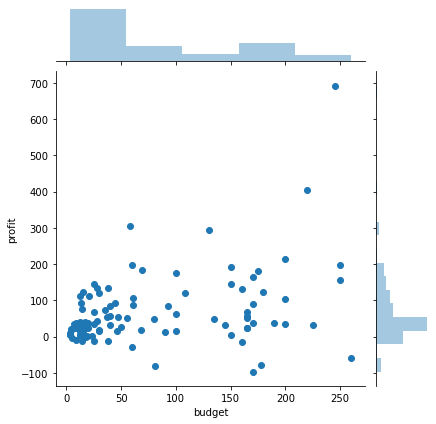

In [32]:
#Plot profit vs budget
sns.jointplot(movies.budget, movies.profit)
plt.show()

#### Inference:
- When the budget of the movie is low, then the profit is also low.
- When the budget is from medium to high range, the profit is in the low range only.
- There are some exceptional cases where when the budget is low, then also profit is high. 
- Few cases are there where when budget being high, the profit is also very high.
- There are also movies which have negative profit even though they have a good budget.  

#### On a broader level, looking at the scatter plot, it is evident that increasing the budget of movies has not resulted in much increase in the profits. If we consider an imaginary regression line, the slop of the line is less.

##### The scatter plot shows that there are movies with negative profit too.

In [33]:
# Movies with negative profit

movies[movies["profit"]<0]

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
99,Tucker and Dale vs Evil,2010,5.00,0.22,Katrina Bowden,Tyler Labine,Chelan Simmons,948,779.00,440.00,...,7.70,7.50,7.40,7.70,7.10,7.70,7.50,R,Canada,-4.78
89,Amour,2012,8.90,0.23,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.00,319.00,...,7.90,7.90,7.80,8.10,7.20,7.90,7.80,PG-13,France,-8.67
56,Rush,2013,38.00,26.90,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,"10,000.00",471.00,...,7.90,7.80,7.80,7.80,7.10,7.90,8.10,R,UK,-11.10
66,Warrior,2011,25.00,13.65,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.00,581.00,...,8.00,7.70,7.70,7.50,7.10,8.20,8.10,PG-13,USA,-11.35
82,Flipped,2010,14.00,1.75,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.00,767.00,...,7.70,7.40,7.30,7.60,6.40,7.50,7.70,PG,USA,-12.25
28,X-Men: First Class,2011,160.00,146.41,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,"13,000.00","1,000.00",...,7.80,7.60,7.50,7.70,7.30,7.80,7.70,PG-13,USA,-13.59
46,Scott Pilgrim vs. the World,2010,60.00,31.49,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,"1,000.00",719.00,...,7.20,7.10,7.10,7.00,6.60,7.80,7.40,PG-13,USA,-28.51
7,Tangled,2010,260.00,200.81,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.00,284.00,...,8.00,7.70,7.60,7.90,6.90,7.90,7.70,PG,USA,-59.19
17,Edge of Tomorrow,2014,178.00,100.19,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.00,509.00,...,7.70,7.80,7.80,7.80,7.50,8.00,7.80,PG-13,USA,-77.81
39,The Little Prince,2015,81.20,1.34,Jeff Bridges,James Franco,Mackenzie Foy,12000,"11,000.00","6,000.00",...,7.90,7.50,7.40,7.90,6.60,7.70,7.70,PG,France,-79.86


In [34]:
# List of movies with losses

movies_loss = movies[movies["profit"]<0]
movies_loss.Title

99        Tucker and Dale vs Evil
89                          Amour
56                           Rush
66                        Warrior
82                        Flipped
28             X-Men: First Class
46    Scott Pilgrim vs. the World
7                         Tangled
17               Edge of Tomorrow
39              The Little Prince
22                           Hugo
Name: Title, dtype: object

### 2.3: Audience and the Critics

- There is a column called `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics.
- Another column `IMDb_rating` tells us the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

#### Let's find out the highest rated movies which have been liked by critics and audiences alike!
- For this, we need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5.
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.

###### Firstly, we need to convert the `MetaCritic` column to a scale of 10 since `IMDb_rating` is on a scale of 10.

In [35]:
# Change the scale of MetaCritic

movies["MetaCritic"] = movies.MetaCritic.apply(lambda x: x/10)
movies["MetaCritic"].head()

97   8.10
11   6.90
47   6.50
32   7.60
12   9.20
Name: MetaCritic, dtype: float64

In [36]:
# The average ratings

movies["Avg_rating"] = (movies.MetaCritic + movies.IMDb_rating)/2
movies[["MetaCritic","IMDb_rating","Avg_rating"]].head()

,MetaCritic,IMDb_rating,Avg_rating
97,8.10,8.10,8.10
11,6.90,8.10,7.50
47,6.50,8.00,7.25
32,7.60,7.60,7.60
12,9.20,8.30,8.75


In [37]:
#Sorting in descending order of average rating

movies.sort_values(by="Avg_rating",ascending=False,inplace=True)
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
94,Boyhood,2014,4.00,25.36,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.00,127.00,...,7.70,7.70,7.70,7.20,8.00,7.90,R,USA,21.36,8.95
69,12 Years a Slave,2013,20.00,56.67,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.00,500.00,...,7.80,7.80,8.10,7.70,8.30,8.00,R,USA,36.67,8.85
18,Inside Out,2015,175.00,356.45,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.00,384.00,...,7.90,7.90,7.90,7.60,8.20,8.10,PG,USA,181.45,8.80
0,La La Land,2016,30.00,151.10,Ryan Gosling,Emma Stone,Amiée Conn,14000,"19,000.00","3,002.15",...,7.60,7.60,7.50,7.10,8.30,8.10,PG-13,USA,121.10,8.75
4,Manchester by the Sea,2016,9.00,47.70,Casey Affleck,Michelle Williams,Kyle Chandler,518,"71,000.00","3,300.00",...,7.60,7.60,7.60,7.10,7.90,7.80,R,USA,38.70,8.75


In [38]:
# Movies with (metacritic - IMDb rating) < 0.5 and also with the average rating of >8

UniversalAcclaim = movies[(abs(movies["MetaCritic"] - movies["IMDb_rating"])<0.5) & (movies["Avg_rating"]>=8)]
UniversalAcclaim.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
95,Whiplash,2014,3.30,13.09,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.00,535.00,...,8.10,8.10,8.20,8.00,8.60,8.40,R,USA,9.79,8.65
35,Django Unchained,2012,100.00,162.80,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,"11,000.00",265.00,...,8.00,8.00,8.10,7.80,8.40,8.40,R,USA,62.80,8.25
93,Dallas Buyers Club,2013,5.00,27.30,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,"3,000.00",896.00,...,7.80,7.80,8.00,7.20,8.00,7.90,R,USA,22.30,8.20
97,Star Wars: Episode VII - The Force Awakens,2015,245.00,936.66,Doug Walker,Rob Walker,0,131,12.00,0.00,...,7.90,7.80,8.20,7.70,8.20,7.90,PG-13,USA,691.66,8.10
3,Arrival,2016,47.00,100.55,Amy Adams,Jeremy Renner,Forest Whitaker,35000,"5,300.00","3,002.15",...,7.60,7.60,7.70,7.30,8.00,7.90,PG-13,USA,53.55,8.05


#### Inference:
Movies like Whiplash, Django Unchained can be considered universally acclaimed movies since they are liked by both critics and the general audience, with an average rating more than 8.

### 2.4: Most Popular Trios

##### Making a blockbuster movie!

Sometimes, it is a good option to have three lead roles in the movie for increasing it's chances for being a blockbuster. What is also  important is to take popular actors. A smart way to do the same, is to analyse trios used in the past. This eliminates the risks of experimenting, as huge capital and resources are at stake.

Luckily, we have the information needed, in our dataset. The metric that can be used here is the Facebook likes of each of these actors. With that, we can finally find the total likes of each trio, giving us an idea of which trios were the most liked. As an analyst, that will help us suggest the production house which trio to go for.

The dataframe has three columns for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. As mentioned above, our objective is to find the trios which have the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.

We will eventually find out the top 5 most popular trios!


In [39]:
movies["sum_of_likes"] = movies.actor_1_facebook_likes.apply(lambda x: x)+movies.actor_2_facebook_likes.apply(lambda x: x)+movies.actor_3_facebook_likes.apply(lambda x: x)
top = movies[["actor_1_name","actor_2_name","actor_3_name","sum_of_likes"]]
top = top.sort_values(by="sum_of_likes",ascending=False)
top = top.drop(labels="sum_of_likes" , axis=1)
top_arr = np.array(top)
top_5 = top_arr[0:5]
top_5 = top_5.tolist()
top_5

[['Dev Patel', 'Nicole Kidman', 'Rooney Mara'],
 ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Casey Affleck', 'Michelle Williams ', 'Kyle Chandler'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']]

###### Having the list of top 5 trios based on popularity, I would like to point out a nuance we might have missed.

If a trio is a high number of likes (in total of the three actors), that doesn't imply that the actor himself/herself is also quite popular. Hence, we might end up choosing a trio where one of the actors might not be that popular individually. This would impact our success rates.

Let's take care of this now!

The condition we can use is **none of the three actors' Facebook likes should be less than half of the other two**.

For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

In this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that we aren't getting any unpopular actor in our trio.

In [40]:
movies["validtrio1"]=(movies.actor_1_facebook_likes.apply(lambda x : float(x))>movies.actor_2_facebook_likes.apply(lambda x: float(x/2))) & (movies.actor_1_facebook_likes.apply(lambda x : float(x))>movies.actor_3_facebook_likes.apply(lambda x: float(x/2)))
movies["validtrio2"]=(movies.actor_2_facebook_likes.apply(lambda x : float(x))>movies.actor_1_facebook_likes.apply(lambda x: float(x/2))) & (movies.actor_2_facebook_likes.apply(lambda x : float(x))>movies.actor_3_facebook_likes.apply(lambda x: float(x/2)))
movies["validtrio3"]=(movies.actor_3_facebook_likes.apply(lambda x : float(x))>movies.actor_1_facebook_likes.apply(lambda x: float(x/2))) & (movies.actor_3_facebook_likes.apply(lambda x : float(x))>movies.actor_2_facebook_likes.apply(lambda x: float(x/2)))
truetrio = movies[(movies["validtrio1"]==True) & (movies["validtrio2"]==True) & (movies["validtrio3"]==True)]
truetrio

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,sum_of_likes,validtrio1,validtrio2,validtrio3
94,Boyhood,2014,4.00,25.36,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.00,127.00,...,8.00,7.90,R,USA,21.36,8.95,550.00,True,True,True
77,The Artist,2011,15.00,44.67,BÃ©rÃ©nice Bejo,Ed Lauter,Beth Grant,996,897.00,628.00,...,8.00,7.90,PG-13,France,29.67,8.40,"2,521.00",True,True,True
51,Argo,2012,44.50,136.02,Clea DuVall,Scoot McNairy,Tate Donovan,1000,660.00,650.00,...,8.00,7.60,R,USA,91.52,8.15,"2,310.00",True,True,True
87,Nebraska,2013,12.00,17.61,Devin Ratray,Bruce Dern,Will Forte,1000,844.00,622.00,...,7.80,7.70,R,USA,5.61,8.15,"2,466.00",True,True,True
27,Inception,2010,160.00,292.57,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,"27,000.00","23,000.00",...,8.70,8.80,PG-13,USA,132.57,8.10,"79,000.00",True,True,True
8,The Dark Knight Rises,2012,250.00,448.13,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,"23,000.00","23,000.00",...,8.40,8.40,PG-13,USA,198.13,8.10,"73,000.00",True,True,True
43,Gone Girl,2014,61.00,167.74,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.00,625.00,...,8.10,8.10,R,USA,106.74,8.00,"2,272.00",True,True,True
26,Interstellar,2014,165.00,187.99,Matthew McConaughey,Anne Hathaway,Mackenzie Foy,11000,"11,000.00","6,000.00",...,8.40,8.50,PG-13,USA,22.99,8.00,"28,000.00",True,True,True
82,Flipped,2010,14.00,1.75,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.00,767.00,...,7.50,7.70,PG,USA,-12.25,7.76,"2,639.00",True,True,True
80,Ex Machina,2014,15.00,25.44,Elina Alminas,Sonoya Mizuno,Corey Johnson,149,145.00,123.00,...,7.90,7.70,R,UK,10.44,7.75,417.00,True,True,True


**Results:**

- **`No. of trios that satisfy the above condition:`** 18

- **`Most popular trio after applying the condition:`** Leonardo DiCaprio, Tom Hardy, Joseph Gordon-Levitt

In [41]:
# To get top 5 trios

true_top = truetrio[["actor_1_name","actor_2_name","actor_3_name","sum_of_likes"]]
true_top = true_top.sort_values(by="sum_of_likes",ascending=False)
true_top = true_top.drop(labels="sum_of_likes" , axis=1)
true_top_arr = np.array(true_top)
true_top_5 = true_top_arr[0:5]
true_top_5 = true_top_5.tolist()
true_top_5

[['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt'],
 ['Chris Hemsworth', 'Robert Downey Jr.', 'Scarlett Johansson'],
 ['Robert Downey Jr.', 'Scarlett Johansson', 'Chris Evans']]

###### Above are the true top 5 trios where all the actors individually are pretty popular too!

### 2.5: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed.

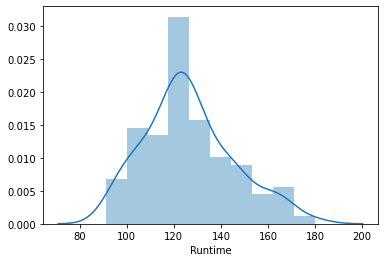

In [42]:
# Runtime plot
sns.distplot(movies.Runtime)
plt.show()

Most of the movies are approximately 2 hour long.

### 2.6: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [43]:
rmovies = movies.loc[movies['content_rating']=='R']
rmovies

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,sum_of_likes,validtrio1,validtrio2,validtrio3
94,Boyhood,2014,4.00,25.36,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.00,127.00,...,8.00,7.90,R,USA,21.36,8.95,550.00,True,True,True
69,12 Years a Slave,2013,20.00,56.67,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.00,500.00,...,8.30,8.00,R,USA,36.67,8.85,"3,160.00",True,False,False
4,Manchester by the Sea,2016,9.00,47.70,Casey Affleck,Michelle Williams,Kyle Chandler,518,"71,000.00","3,300.00",...,7.90,7.80,R,USA,38.70,8.75,"74,818.00",False,True,False
70,Spotlight,2015,20.00,44.99,Billy Crudup,Jamey Sheridan,Brian d'Arcy James,745,168.00,77.00,...,8.30,8.00,R,USA,24.99,8.70,990.00,True,False,False
95,Whiplash,2014,3.30,13.09,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.00,535.00,...,8.60,8.40,R,USA,9.79,8.65,"25,505.00",True,False,False
96,Before Midnight,2013,3.00,8.11,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.00,48.00,...,8.00,7.90,R,USA,5.11,8.65,251.00,True,False,False
29,Mad Max: Fury Road,2015,150.00,153.63,Tom Hardy,Charlize Theron,ZoÃ« Kravitz,27000,"9,000.00",943.00,...,8.20,8.00,R,Australia,3.63,8.55,"36,943.00",True,False,False
67,Her,2013,23.00,25.56,Scarlett Johansson,Brian Johnson,Matt Letscher,19000,128.00,105.00,...,8.10,7.90,R,USA,2.56,8.50,"19,233.00",True,False,False
65,The Grand Budapest Hotel,2014,25.00,59.07,Bill Murray,Tom Wilkinson,F. Murray Abraham,13000,"1,000.00",670.00,...,8.10,8.00,R,USA,34.07,8.45,"14,670.00",True,False,False
76,The King's Speech,2010,15.00,138.80,Colin Firth,Jennifer Ehle,Derek Jacobi,14000,"1,000.00",520.00,...,8.20,8.00,R,UK,123.80,8.40,"15,520.00",True,False,False


As we can see here, there are in total of 42 'R' rated movies.
Now, let us find out what kids are watching!

In [44]:
rmovies.sort_values(by="CVotesU18", ascending=False, inplace = True)
rmovies[["Title","content_rating","CVotesU18"]].head(10)

,Title,content_rating,CVotesU18
47,Deadpool,R,4598
36,The Wolf of Wall Street,R,3622
35,Django Unchained,R,3250
29,Mad Max: Fury Road,R,3159
95,Whiplash,R,2878
31,The Revenant,R,2619
40,Shutter Island,R,2321
43,Gone Girl,R,2286
65,The Grand Budapest Hotel,R,2083
72,Birdman or (The Unexpected Virtue of Ignorance),R,1891


Deadpool, The Wolf of Wall Street etc. are some of the "R" rated movies that the kids seem to love.

## 3) Demographic analysis

#### What are demographics?

Demographics are statistical data used to study particular groups of humans, while a demographic refers to distinct charecteristics of a population. Demographic segmentation can be done on the basis of various factors like age, gender, family, income etc.

For our **demographic analysis**, we will use columns with voters of different ages and those with three different genres and find out which genres are liked more among which age groups.

### 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`.

Steps:

1. Creating a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Adding a column called `cnt` to the dataframe `df_by_genre` and initialize it to one.
3. Grouping the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Performing the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. For combining these 3 dataframes, we need to add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre. We will use a function called `add()` in pandas for this.
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre. Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, taking the mean of all the numeric columns by dividing them with the column value `cnt` and storing it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers.

In [45]:
# Create the dataframe df_by_genre
df_by_genre=movies[['genre_1',
'genre_2',
'genre_3',
'CVotes10',
'CVotes09',
'CVotes08',
'CVotes07',
'CVotes06',
'CVotes05',
'CVotes04',
'CVotes03',
'CVotes02',
'CVotes01',
'CVotesMale',
'CVotesFemale',
'CVotesU18',
'CVotesU18M',
'CVotesU18F',
'CVotes1829',
'CVotes1829M',
'CVotes1829F',
'CVotes3044',
'CVotes3044M',
'CVotes3044F',
'CVotes45A',
'CVotes45AM',
'CVotes45AF',
'CVotes1000',
'CVotesUS',
'CVotesnUS',
'VotesM',
'VotesF',
'VotesU18',
'VotesU18M',
'VotesU18F',
'Votes1829',
'Votes1829M',
'Votes1829F',
'Votes3044',
'Votes3044M',
'Votes3044F',
'Votes45A',
'Votes45AM',
'Votes45AF',
'Votes1000',
'VotesUS',
'VotesnUS'
]]
df_by_genre



,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
94,Drama,Drama,Sci-Fi,49673,62055,76838,52238,23789,10431,4906,...,7.80,7.80,7.80,7.60,7.70,7.70,7.70,7.20,8.00,7.90
69,Biography,Drama,History,75556,126223,161460,83070,27231,9603,4021,...,8.20,8.00,7.90,8.00,7.80,7.80,8.10,7.70,8.30,8.00
18,Animation,Adventure,Comedy,87509,113244,119801,67153,24210,8542,3349,...,8.30,8.10,8.10,8.10,7.90,7.90,7.90,7.60,8.20,8.10
0,Comedy,Drama,Music,74245,71191,64640,38831,17377,8044,3998,...,8.20,7.90,7.90,7.80,7.60,7.60,7.50,7.10,8.30,8.10
4,Drama,Drama,Sci-Fi,18191,33532,46596,29626,11879,4539,1976,...,7.80,7.70,7.70,7.70,7.60,7.60,7.60,7.10,7.90,7.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,Action,Adventure,Sci-Fi,64428,96219,200144,129352,41945,12861,4799,...,8.00,7.70,7.60,7.80,7.60,7.50,7.70,7.30,7.80,7.70
98,Adventure,Family,Fantasy,68937,54947,102488,80465,31205,11792,4808,...,8.30,7.40,7.30,8.10,7.40,7.30,8.00,6.70,7.90,7.50
99,Comedy,Horror,Sci-Fi,16572,19818,44460,35863,13456,4588,1684,...,7.60,7.50,7.50,7.70,7.50,7.40,7.70,7.10,7.70,7.50
42,Action,Drama,War,36753,54703,111271,82505,30231,10553,4303,...,7.70,7.40,7.40,7.40,7.40,7.40,7.40,6.80,7.60,7.50


In [46]:
# Create a column cnt and initialize it to 1
df_by_genre["cnt"]=1
df_by_genre


,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
94,Drama,Drama,Sci-Fi,49673,62055,76838,52238,23789,10431,4906,...,7.80,7.80,7.60,7.70,7.70,7.70,7.20,8.00,7.90,1
69,Biography,Drama,History,75556,126223,161460,83070,27231,9603,4021,...,8.00,7.90,8.00,7.80,7.80,8.10,7.70,8.30,8.00,1
18,Animation,Adventure,Comedy,87509,113244,119801,67153,24210,8542,3349,...,8.10,8.10,8.10,7.90,7.90,7.90,7.60,8.20,8.10,1
0,Comedy,Drama,Music,74245,71191,64640,38831,17377,8044,3998,...,7.90,7.90,7.80,7.60,7.60,7.50,7.10,8.30,8.10,1
4,Drama,Drama,Sci-Fi,18191,33532,46596,29626,11879,4539,1976,...,7.70,7.70,7.70,7.60,7.60,7.60,7.10,7.90,7.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,Action,Adventure,Sci-Fi,64428,96219,200144,129352,41945,12861,4799,...,7.70,7.60,7.80,7.60,7.50,7.70,7.30,7.80,7.70,1
98,Adventure,Family,Fantasy,68937,54947,102488,80465,31205,11792,4808,...,7.40,7.30,8.10,7.40,7.30,8.00,6.70,7.90,7.50,1
99,Comedy,Horror,Sci-Fi,16572,19818,44460,35863,13456,4588,1684,...,7.50,7.50,7.70,7.50,7.40,7.70,7.10,7.70,7.50,1
42,Action,Drama,War,36753,54703,111271,82505,30231,10553,4303,...,7.40,7.40,7.40,7.40,7.40,7.40,6.80,7.60,7.50,1


In [47]:
# Group the movies by individual genres
df_by_genre.set_index("genre_1", inplace=True)
df_by_g1 = df_by_genre[['CVotes10',
'CVotes09',
'CVotes08',
'CVotes07',
'CVotes06',
'CVotes05',
'CVotes04',
'CVotes03',
'CVotes02',
'CVotes01',
'CVotesMale',
'CVotesFemale',
'CVotesU18',
'CVotesU18M',
'CVotesU18F',
'CVotes1829',
'CVotes1829M',
'CVotes1829F',
'CVotes3044',
'CVotes3044M',
'CVotes3044F',
'CVotes45A',
'CVotes45AM',
'CVotes45AF',
'CVotes1000',
'CVotesUS',
'CVotesnUS',
'VotesM',
'VotesF',
'VotesU18',
'VotesU18M',
'VotesU18F',
'Votes1829',
'Votes1829M',
'Votes1829F',
'Votes3044',
'Votes3044M',
'Votes3044F',
'Votes45A',
'Votes45AM',
'Votes45AF',
'Votes1000',
'VotesUS',
'VotesnUS','cnt']].groupby("genre_1").sum()
df_by_g1


,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_1,,,,,,,,,,,,,,,,,,,,,
Action,2928407,3261919,4247693,2662020,986774,364234,156150,89483,61975,162426,...,209.10,208.80,210.00,206.50,206.00,209.00,197.20,215.80,209.50,27
Adventure,1058779,1179818,1560541,966275,365486,136985,58559,33174,22018,48100,...,92.70,92.60,93.50,92.00,91.60,93.80,88.90,95.30,93.50,12
Animation,681562,798227,1153214,722782,251076,83069,30718,15733,10026,25193,...,85.40,84.90,87.80,84.50,84.10,86.70,80.00,87.60,86.10,11
Biography,666831,1088430,1654704,962977,306247,100005,38874,21536,15365,37469,...,100.80,100.70,101.30,100.50,100.00,102.90,94.70,103.30,101.50,13
Comedy,371217,496905,770395,518566,205434,81933,35788,20965,15286,33241,...,68.60,68.70,68.90,67.70,67.50,68.70,62.70,70.90,69.40,9
Crime,383290,690221,1083469,627593,206756,71460,30336,17190,11757,25839,...,69.40,69.70,68.80,68.70,68.60,69.60,66.30,71.90,70.10,9
Drama,1080725,1494053,1827363,1078966,417205,163874,75525,45846,32068,71464,...,139.30,139.00,139.70,137.70,137.20,138.70,130.00,143.20,141.10,18
Mystery,150405,230844,278844,132349,45167,15615,7061,3780,2662,4703,...,7.90,7.90,8.00,7.50,7.40,7.60,7.60,7.80,8.10,1


In [48]:
df_by_genre.reset_index(inplace=True)
df_by_genre

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Drama,Drama,Sci-Fi,49673,62055,76838,52238,23789,10431,4906,...,7.80,7.80,7.60,7.70,7.70,7.70,7.20,8.00,7.90,1
1,Biography,Drama,History,75556,126223,161460,83070,27231,9603,4021,...,8.00,7.90,8.00,7.80,7.80,8.10,7.70,8.30,8.00,1
2,Animation,Adventure,Comedy,87509,113244,119801,67153,24210,8542,3349,...,8.10,8.10,8.10,7.90,7.90,7.90,7.60,8.20,8.10,1
3,Comedy,Drama,Music,74245,71191,64640,38831,17377,8044,3998,...,7.90,7.90,7.80,7.60,7.60,7.50,7.10,8.30,8.10,1
4,Drama,Drama,Sci-Fi,18191,33532,46596,29626,11879,4539,1976,...,7.70,7.70,7.70,7.60,7.60,7.60,7.10,7.90,7.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Action,Adventure,Sci-Fi,64428,96219,200144,129352,41945,12861,4799,...,7.70,7.60,7.80,7.60,7.50,7.70,7.30,7.80,7.70,1
96,Adventure,Family,Fantasy,68937,54947,102488,80465,31205,11792,4808,...,7.40,7.30,8.10,7.40,7.30,8.00,6.70,7.90,7.50,1
97,Comedy,Horror,Sci-Fi,16572,19818,44460,35863,13456,4588,1684,...,7.50,7.50,7.70,7.50,7.40,7.70,7.10,7.70,7.50,1
98,Action,Drama,War,36753,54703,111271,82505,30231,10553,4303,...,7.40,7.40,7.40,7.40,7.40,7.40,6.80,7.60,7.50,1


In [49]:
df_by_genre.set_index("genre_2", inplace=True)
df_by_g2 = df_by_genre[['CVotes10',
'CVotes09',
'CVotes08',
'CVotes07',
'CVotes06',
'CVotes05',
'CVotes04',
'CVotes03',
'CVotes02',
'CVotes01',
'CVotesMale',
'CVotesFemale',
'CVotesU18',
'CVotesU18M',
'CVotesU18F',
'CVotes1829',
'CVotes1829M',
'CVotes1829F',
'CVotes3044',
'CVotes3044M',
'CVotes3044F',
'CVotes45A',
'CVotes45AM',
'CVotes45AF',
'CVotes1000',
'CVotesUS',
'CVotesnUS',
'VotesM',
'VotesF',
'VotesU18',
'VotesU18M',
'VotesU18F',
'Votes1829',
'Votes1829M',
'Votes1829F',
'Votes3044',
'Votes3044M',
'Votes3044F',
'Votes45A',
'Votes45AM',
'Votes45AF',
'Votes1000',
'VotesUS',
'VotesnUS','cnt']].groupby("genre_2").sum()
df_by_g2

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_2,,,,,,,,,,,,,,,,,,,,,
Action,238060,285510,430062,260106,88580,29250,10820,5521,3598,8821,...,30.90,30.70,31.80,30.50,30.40,31.40,29.00,31.80,31.10,4
Adventure,2297820,2548864,3271725,2055600,758009,272735,113691,64623,44121,116937,...,171.00,170.40,173.90,169.20,168.40,172.80,162.70,176.40,171.60,22
Biography,185172,313178,576374,370003,119348,38643,14844,7974,5248,13828,...,38.30,38.20,38.50,38.00,37.90,38.80,35.40,39.40,38.40,5
Comedy,428995,624720,854162,512668,193916,76752,35193,20995,14798,30509,...,54.00,54.10,53.40,53.00,53.10,53.10,51.00,55.50,54.30,7
Crime,19576,40247,85359,64633,24920,8548,3261,1669,970,1689,...,7.50,7.60,7.20,7.60,7.60,7.40,7.20,7.80,7.60,1
Drama,2052167,2939384,4351714,2631139,906370,321081,133849,75835,53752,122764,...,293.60,293.70,293.70,291.20,290.30,295.40,274.70,302.10,296.30,38
Family,68937,54947,102488,80465,31205,11792,4808,2454,1617,4522,...,7.40,7.30,8.10,7.40,7.30,8.00,6.70,7.90,7.50,1
Fantasy,270616,290831,447307,291071,120920,47215,19848,10871,6885,14702,...,22.90,22.90,23.30,23.00,22.80,23.70,22.10,23.40,23.20,3
History,15757,32840,83322,63800,19183,5178,1657,735,419,878,...,7.50,7.50,7.50,7.70,7.60,7.90,7.40,7.70,7.50,1


In [50]:
df_by_genre.reset_index(inplace=True)
df_by_genre

,genre_2,genre_1,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Drama,Drama,Sci-Fi,49673,62055,76838,52238,23789,10431,4906,...,7.80,7.80,7.60,7.70,7.70,7.70,7.20,8.00,7.90,1
1,Drama,Biography,History,75556,126223,161460,83070,27231,9603,4021,...,8.00,7.90,8.00,7.80,7.80,8.10,7.70,8.30,8.00,1
2,Adventure,Animation,Comedy,87509,113244,119801,67153,24210,8542,3349,...,8.10,8.10,8.10,7.90,7.90,7.90,7.60,8.20,8.10,1
3,Drama,Comedy,Music,74245,71191,64640,38831,17377,8044,3998,...,7.90,7.90,7.80,7.60,7.60,7.50,7.10,8.30,8.10,1
4,Drama,Drama,Sci-Fi,18191,33532,46596,29626,11879,4539,1976,...,7.70,7.70,7.70,7.60,7.60,7.60,7.10,7.90,7.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Adventure,Action,Sci-Fi,64428,96219,200144,129352,41945,12861,4799,...,7.70,7.60,7.80,7.60,7.50,7.70,7.30,7.80,7.70,1
96,Family,Adventure,Fantasy,68937,54947,102488,80465,31205,11792,4808,...,7.40,7.30,8.10,7.40,7.30,8.00,6.70,7.90,7.50,1
97,Horror,Comedy,Sci-Fi,16572,19818,44460,35863,13456,4588,1684,...,7.50,7.50,7.70,7.50,7.40,7.70,7.10,7.70,7.50,1
98,Drama,Action,War,36753,54703,111271,82505,30231,10553,4303,...,7.40,7.40,7.40,7.40,7.40,7.40,6.80,7.60,7.50,1


In [51]:
df_by_genre.set_index("genre_3", inplace=True)
df_by_g3 = df_by_genre[['CVotes10',
'CVotes09',
'CVotes08',
'CVotes07',
'CVotes06',
'CVotes05',
'CVotes04',
'CVotes03',
'CVotes02',
'CVotes01',
'CVotesMale',
'CVotesFemale',
'CVotesU18',
'CVotesU18M',
'CVotesU18F',
'CVotes1829',
'CVotes1829M',
'CVotes1829F',
'CVotes3044',
'CVotes3044M',
'CVotes3044F',
'CVotes45A',
'CVotes45AM',
'CVotes45AF',
'CVotes1000',
'CVotesUS',
'CVotesnUS',
'VotesM',
'VotesF',
'VotesU18',
'VotesU18M',
'VotesU18F',
'Votes1829',
'Votes1829M',
'Votes1829F',
'Votes3044',
'Votes3044M',
'Votes3044F',
'Votes45A',
'Votes45AM',
'Votes45AF',
'Votes1000',
'VotesUS',
'VotesnUS','cnt']].groupby("genre_3").sum()
df_by_g3

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_3,,,,,,,,,,,,,,,,,,,,,
Adventure,238060,285510,430062,260106,88580,29250,10820,5521,3598,8821,...,30.90,30.70,31.80,30.50,30.40,31.40,29.00,31.80,31.10,4
Comedy,583404,653362,882294,559835,200937,68167,26488,14258,9307,24617,...,54.80,54.60,56.00,54.30,54.10,55.30,51.70,56.20,55.20,7
Crime,171660,236650,250667,129164,46715,18682,8674,5854,4258,9689,...,8.00,8.10,7.70,7.60,7.60,7.50,7.80,8.10,8.10,1
Drama,400221,680085,1167327,748493,258717,88338,35439,19075,12475,26948,...,91.80,91.70,92.00,91.20,91.00,92.70,86.10,94.50,92.30,12
Family,29228,40728,77893,62936,27932,11179,4664,2674,1700,3023,...,7.40,7.40,7.40,7.50,7.50,7.60,7.40,7.70,7.50,1
Fantasy,301836,311392,442460,308676,120911,46269,19555,11362,7808,24139,...,30.40,30.20,31.70,30.40,30.00,31.80,28.40,31.50,30.50,4
History,135504,227547,311209,159262,48678,16055,6307,3649,2729,8413,...,23.70,23.60,23.80,23.30,23.10,24.20,22.00,24.50,23.70,3
Music,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,...,7.90,7.90,7.80,7.60,7.60,7.50,7.10,8.30,8.10,1
Mystery,274446,443661,654167,375087,128131,44818,18755,10578,7149,17825,...,30.80,30.80,31.50,30.40,30.30,31.30,29.30,31.90,31.30,4


In [52]:
df_by_genre.reset_index(inplace=True)
df_by_genre

,genre_3,genre_2,genre_1,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Sci-Fi,Drama,Drama,49673,62055,76838,52238,23789,10431,4906,...,7.80,7.80,7.60,7.70,7.70,7.70,7.20,8.00,7.90,1
1,History,Drama,Biography,75556,126223,161460,83070,27231,9603,4021,...,8.00,7.90,8.00,7.80,7.80,8.10,7.70,8.30,8.00,1
2,Comedy,Adventure,Animation,87509,113244,119801,67153,24210,8542,3349,...,8.10,8.10,8.10,7.90,7.90,7.90,7.60,8.20,8.10,1
3,Music,Drama,Comedy,74245,71191,64640,38831,17377,8044,3998,...,7.90,7.90,7.80,7.60,7.60,7.50,7.10,8.30,8.10,1
4,Sci-Fi,Drama,Drama,18191,33532,46596,29626,11879,4539,1976,...,7.70,7.70,7.70,7.60,7.60,7.60,7.10,7.90,7.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sci-Fi,Adventure,Action,64428,96219,200144,129352,41945,12861,4799,...,7.70,7.60,7.80,7.60,7.50,7.70,7.30,7.80,7.70,1
96,Fantasy,Family,Adventure,68937,54947,102488,80465,31205,11792,4808,...,7.40,7.30,8.10,7.40,7.30,8.00,6.70,7.90,7.50,1
97,Sci-Fi,Horror,Comedy,16572,19818,44460,35863,13456,4588,1684,...,7.50,7.50,7.70,7.50,7.40,7.70,7.10,7.70,7.50,1
98,War,Drama,Action,36753,54703,111271,82505,30231,10553,4303,...,7.40,7.40,7.40,7.40,7.40,7.40,6.80,7.60,7.50,1


In [53]:
# Add the grouped data frames and store it in a new data frame
df_add = df_by_g1.add(df_by_g2,fill_value=0).add(df_by_g3,fill_value=0)
df_add

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,"3,166,467.00","3,547,429.00","4,677,755.00","2,922,126.00","1,075,354.00","393,484.00","166,970.00","95,004.00","65,573.00","171,247.00",...,240.00,239.50,241.80,237.00,236.40,240.40,226.20,247.60,240.60,31.00
Adventure,"3,594,659.00","4,014,192.00","5,262,328.00","3,281,981.00","1,212,075.00","438,970.00","183,070.00","103,318.00","69,737.00","173,858.00",...,294.60,293.70,299.20,291.70,290.40,298.00,280.60,303.50,296.20,38.00
Animation,"681,562.00","798,227.00","1,153,214.00","722,782.00","251,076.00","83,069.00","30,718.00","15,733.00","10,026.00","25,193.00",...,85.40,84.90,87.80,84.50,84.10,86.70,80.00,87.60,86.10,11.00
Biography,"852,003.00","1,401,608.00","2,231,078.00","1,332,980.00","425,595.00","138,648.00","53,718.00","29,510.00","20,613.00","51,297.00",...,139.10,138.90,139.80,138.50,137.90,141.70,130.10,142.70,139.90,18.00
Comedy,"1,383,616.00","1,774,987.00","2,506,851.00","1,591,069.00","600,287.00","226,852.00","97,469.00","56,218.00","39,391.00","88,367.00",...,177.40,177.40,178.30,175.00,174.70,177.10,165.40,182.60,178.90,23.00
Crime,"574,526.00","967,118.00","1,419,495.00","821,390.00","278,391.00","98,690.00","42,271.00","24,713.00","16,985.00","37,217.00",...,84.90,85.40,83.70,83.90,83.80,84.50,81.30,87.80,85.80,11.00
Drama,"3,533,113.00","5,113,522.00","7,346,404.00","4,458,598.00","1,582,292.00","573,293.00","244,813.00","140,756.00","98,295.00","221,176.00",...,524.70,524.40,525.40,520.10,518.50,526.80,490.80,539.80,529.70,68.00
Family,"98,165.00","95,675.00","180,381.00","143,401.00","59,137.00","22,971.00","9,472.00","5,128.00","3,317.00","7,545.00",...,14.80,14.70,15.50,14.90,14.80,15.60,14.10,15.60,15.00,2.00
Fantasy,"572,452.00","602,223.00","889,767.00","599,747.00","241,831.00","93,484.00","39,403.00","22,233.00","14,693.00","38,841.00",...,53.30,53.10,55.00,53.40,52.80,55.50,50.50,54.90,53.70,7.00
History,"151,261.00","260,387.00","394,531.00","223,062.00","67,861.00","21,233.00","7,964.00","4,384.00","3,148.00","9,291.00",...,31.20,31.10,31.30,31.00,30.70,32.10,29.40,32.20,31.20,4.00


In [54]:
# Extract genres with atleast 10 occurences
genre_top10 = df_add[df_add["cnt"]>=10]
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,"3,166,467.00","3,547,429.00","4,677,755.00","2,922,126.00","1,075,354.00","393,484.00","166,970.00","95,004.00","65,573.00","171,247.00",...,240.00,239.50,241.80,237.00,236.40,240.40,226.20,247.60,240.60,31.00
Adventure,"3,594,659.00","4,014,192.00","5,262,328.00","3,281,981.00","1,212,075.00","438,970.00","183,070.00","103,318.00","69,737.00","173,858.00",...,294.60,293.70,299.20,291.70,290.40,298.00,280.60,303.50,296.20,38.00
Animation,"681,562.00","798,227.00","1,153,214.00","722,782.00","251,076.00","83,069.00","30,718.00","15,733.00","10,026.00","25,193.00",...,85.40,84.90,87.80,84.50,84.10,86.70,80.00,87.60,86.10,11.00
Biography,"852,003.00","1,401,608.00","2,231,078.00","1,332,980.00","425,595.00","138,648.00","53,718.00","29,510.00","20,613.00","51,297.00",...,139.10,138.90,139.80,138.50,137.90,141.70,130.10,142.70,139.90,18.00
Comedy,"1,383,616.00","1,774,987.00","2,506,851.00","1,591,069.00","600,287.00","226,852.00","97,469.00","56,218.00","39,391.00","88,367.00",...,177.40,177.40,178.30,175.00,174.70,177.10,165.40,182.60,178.90,23.00
Crime,"574,526.00","967,118.00","1,419,495.00","821,390.00","278,391.00","98,690.00","42,271.00","24,713.00","16,985.00","37,217.00",...,84.90,85.40,83.70,83.90,83.80,84.50,81.30,87.80,85.80,11.00
Drama,"3,533,113.00","5,113,522.00","7,346,404.00","4,458,598.00","1,582,292.00","573,293.00","244,813.00","140,756.00","98,295.00","221,176.00",...,524.70,524.40,525.40,520.10,518.50,526.80,490.80,539.80,529.70,68.00
Romance,"549,959.00","689,492.00","1,069,280.00","712,841.00","281,289.00","110,901.00","48,913.00","27,698.00","19,200.00","40,075.00",...,98.90,98.90,99.60,97.80,97.50,98.90,89.90,101.80,100.10,13.00
Sci-Fi,"4,532,848.00","5,241,367.00","6,337,023.00","3,717,586.00","1,399,812.00","535,244.00","238,475.00","140,132.00","98,694.00","239,759.00",...,336.10,335.80,337.00,331.00,329.90,334.20,317.40,345.00,338.60,43.00
Thriller,"1,081,701.00","1,465,491.00","1,993,378.00","1,175,799.00","416,046.00","149,953.00","65,281.00","37,940.00","25,767.00","57,630.00",...,100.60,100.70,100.10,99.60,99.30,100.70,96.20,103.10,101.50,13.00


In [55]:
# Take the mean for every column by dividing with cnt 
for columns in genre_top10.columns:
    if columns!='cnt':
        genre_top10[columns]=genre_top10[columns]/genre_top10["cnt"]
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,"102,144.10","114,433.19","150,895.32","94,262.13","34,688.84","12,693.03","5,386.13","3,064.65","2,115.26","5,524.10",...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.00
Adventure,"94,596.29","105,636.63","138,482.32","86,367.92","31,896.71","11,551.84","4,817.63","2,718.89","1,835.18","4,575.21",...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.00
Animation,"61,960.18","72,566.09","104,837.64","65,707.45","22,825.09","7,551.73","2,792.55","1,430.27",911.45,"2,290.27",...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.00
Biography,"47,333.50","77,867.11","123,948.78","74,054.44","23,644.17","7,702.67","2,984.33","1,639.44","1,145.17","2,849.83",...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.00
Comedy,"60,157.22","77,173.35","108,993.52","69,176.91","26,099.43","9,863.13","4,237.78","2,444.26","1,712.65","3,842.04",...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.00
Crime,"52,229.64","87,919.82","129,045.00","74,671.82","25,308.27","8,971.82","3,842.82","2,246.64","1,544.09","3,383.36",...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.00
Drama,"51,957.54","75,198.85","108,035.35","65,567.62","23,269.00","8,430.78","3,600.19","2,069.94","1,445.51","3,252.59",...,7.72,7.71,7.73,7.65,7.62,7.75,7.22,7.94,7.79,68.00
Romance,"42,304.54","53,037.85","82,252.31","54,833.92","21,637.62","8,530.85","3,762.54","2,130.62","1,476.92","3,082.69",...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.00
Sci-Fi,"105,415.07","121,892.26","147,372.63","86,455.49","32,553.77","12,447.53","5,545.93","3,258.88","2,295.21","5,575.79",...,7.82,7.81,7.84,7.70,7.67,7.77,7.38,8.02,7.87,43.00
Thriller,"83,207.77","112,730.08","153,336.77","90,446.08","32,003.54","11,534.85","5,021.62","2,918.46","1,982.08","4,433.08",...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.00


In [56]:
# Rounding off the columns of Votes to two decimals
for columns in genre_top10.filter(regex="^Votes*").columns: #looping through the columns of the filtered dataframe on the basis of regular expression (columns starting with Votes)
    genre_top10[columns]=round(genre_top10[columns],2) #saving the rounded value upto 2 decimal places into the same field value
genre_top10


,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,"102,144.10","114,433.19","150,895.32","94,262.13","34,688.84","12,693.03","5,386.13","3,064.65","2,115.26","5,524.10",...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.00
Adventure,"94,596.29","105,636.63","138,482.32","86,367.92","31,896.71","11,551.84","4,817.63","2,718.89","1,835.18","4,575.21",...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.00
Animation,"61,960.18","72,566.09","104,837.64","65,707.45","22,825.09","7,551.73","2,792.55","1,430.27",911.45,"2,290.27",...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.00
Biography,"47,333.50","77,867.11","123,948.78","74,054.44","23,644.17","7,702.67","2,984.33","1,639.44","1,145.17","2,849.83",...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.00
Comedy,"60,157.22","77,173.35","108,993.52","69,176.91","26,099.43","9,863.13","4,237.78","2,444.26","1,712.65","3,842.04",...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.00
Crime,"52,229.64","87,919.82","129,045.00","74,671.82","25,308.27","8,971.82","3,842.82","2,246.64","1,544.09","3,383.36",...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.00
Drama,"51,957.54","75,198.85","108,035.35","65,567.62","23,269.00","8,430.78","3,600.19","2,069.94","1,445.51","3,252.59",...,7.72,7.71,7.73,7.65,7.62,7.75,7.22,7.94,7.79,68.00
Romance,"42,304.54","53,037.85","82,252.31","54,833.92","21,637.62","8,530.85","3,762.54","2,130.62","1,476.92","3,082.69",...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.00
Sci-Fi,"105,415.07","121,892.26","147,372.63","86,455.49","32,553.77","12,447.53","5,545.93","3,258.88","2,295.21","5,575.79",...,7.82,7.81,7.84,7.70,7.67,7.77,7.38,8.02,7.87,43.00
Thriller,"83,207.77","112,730.08","153,336.77","90,446.08","32,003.54","11,534.85","5,021.62","2,918.46","1,982.08","4,433.08",...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.00


In [57]:
# Converting CVotes to int type
for columns in genre_top10.filter(regex="^CVotes*").columns:#looping through the columns of the filtered dataframe on the basis of regular expression (columns starting with CVotes)
    genre_top10[columns]=genre_top10[columns].astype("int32")#Typecasting the field value to Int32 format using astype function
genre_top10


,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.00
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.00
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.00
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.00
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.00
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.00
Drama,51957,75198,108035,65567,23269,8430,3600,2069,1445,3252,...,7.72,7.71,7.73,7.65,7.62,7.75,7.22,7.94,7.79,68.00
Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.00
Sci-Fi,105415,121892,147372,86455,32553,12447,5545,3258,2295,5575,...,7.82,7.81,7.84,7.70,7.67,7.77,7.38,8.02,7.87,43.00
Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.00


##### Evident from the above dataset, top 3 genres on the basis of votes are:
- Action
- Adventure
- Animation

### 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

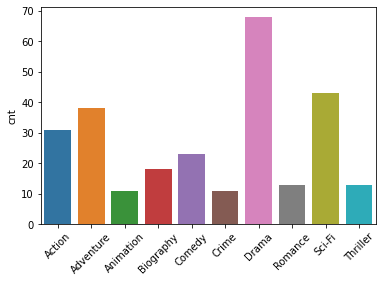

In [58]:
# Countplot for genres
sns.barplot(data=genre_top10 , y="cnt",x=genre_top10.index)
plt.xticks(rotation=45)
plt.show()

**Drama** seems to be the most loved genre!

### 3.3: Gender and Genre

In our dataset, we have Votes- and CVotes-related columns with suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe.



- First heatmap:  How the **average number of votes of males** is varying across the **genres**. Here, X-axis would contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres with annotations telling the average number of votes for that age-male group.


- Second heatmap: How the **average number of votes of females** is varying across the **genres**. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres with annotations telling the average number of votes for that age-female group.


- We're going to use the **Seaborn** library with `subplots` for plotting the heatmaps.


- It also makes sense to use **genre_top10** dataframe for this!

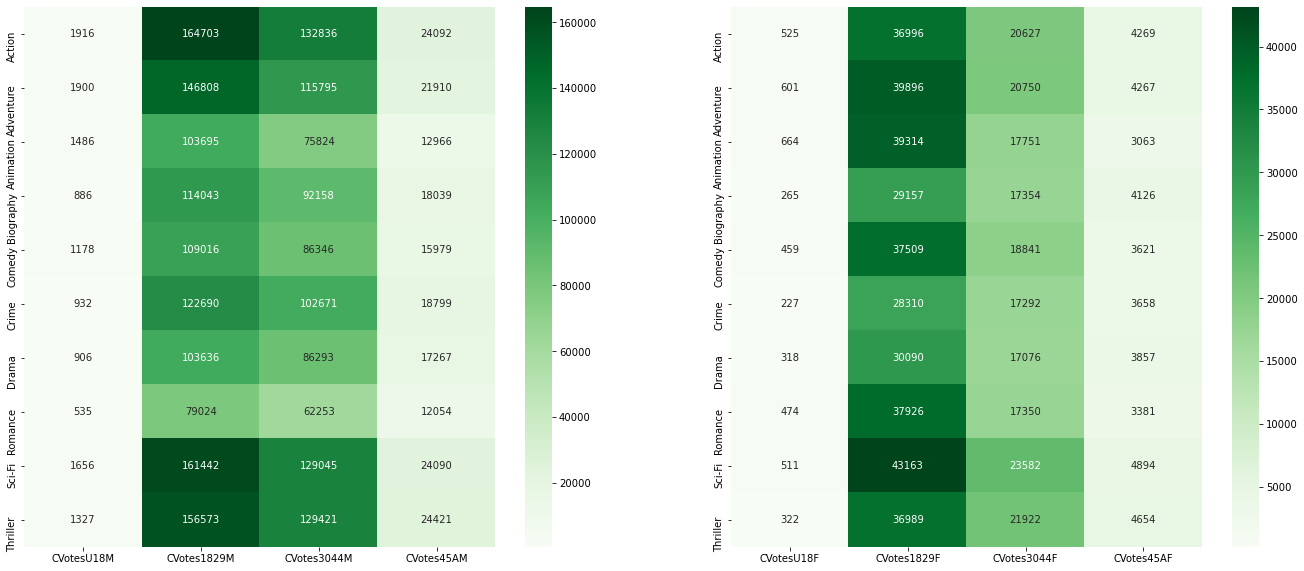

In [59]:
# 1st set of heat maps for CVotes-related columns
male=genre_top10.groupby(genre_top10.index)["CVotesU18M","CVotes1829M","CVotes3044M","CVotes45AM"].mean()
female=genre_top10.groupby(genre_top10.index)["CVotesU18F","CVotes1829F","CVotes3044F","CVotes45AF"].mean()

fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(left=10,right=13,top=2)
sns.heatmap(male,cmap="Greens",ax=ax1,annot=True,fmt="d")
sns.heatmap(female,cmap="Greens",ax=ax2,annot=True,fmt="d")
plt.show()


**Inferences:**

- Males have voted more than females in general.
- *Sci-Fi* appears to be most popular among the *18-29 age group* irrespective of their gender.
- *Action* movies are the second most popular among the 18-29 age group.
- Another popular category of movies for both male and female is *Adventure*.
- Females are more interested in *Animation* movies when compared to Males, even though males have voted more than females for this genre.

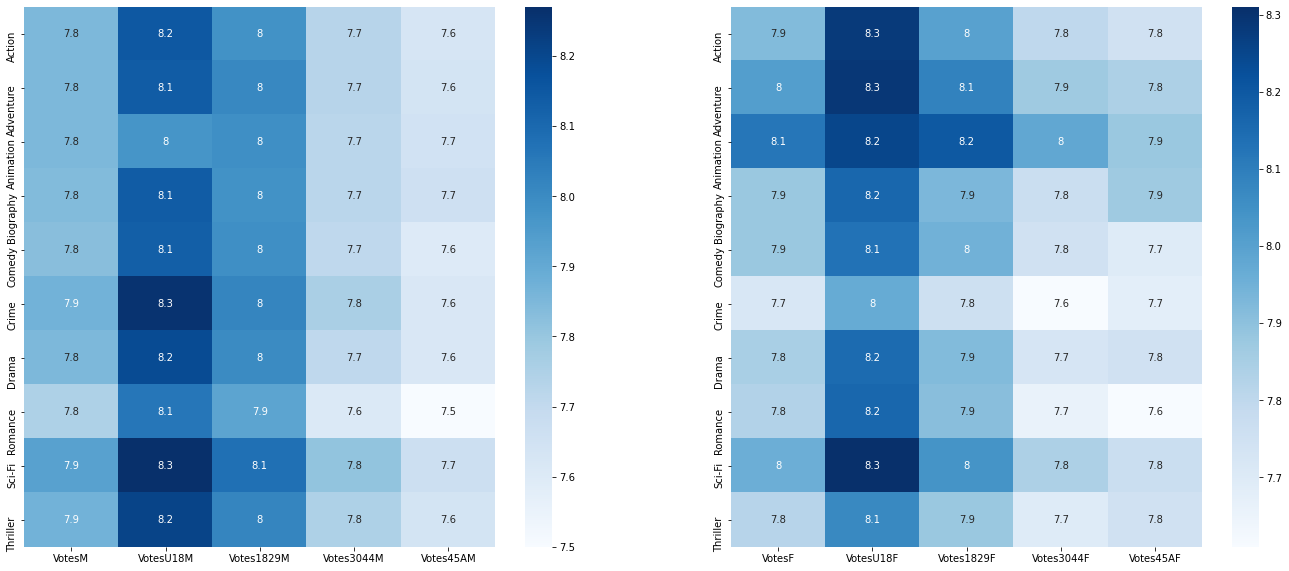

In [60]:
# 2nd set of heat maps for Votes-related columns
votes_columns_male=["VotesM","VotesU18M","Votes1829M","Votes3044M","Votes45AM"]
votes_columns_female =["VotesF","VotesU18F","Votes1829F","Votes3044F","Votes45AF"]
votes_male=genre_top10.groupby(genre_top10.index)[votes_columns_male].mean()
votes_female=genre_top10.groupby(genre_top10.index)[votes_columns_female].mean()
fig,(ax1,ax2)=plt.subplots(1,2)
plt.subplots_adjust(left=10,right=13,top=2)
sns.heatmap(votes_male,cmap="Blues",ax=ax1,annot=True)
sns.heatmap(votes_female,cmap="Blues",ax=ax2,annot=True)
plt.show()

**Inferences:**

- *Sci-Fi* appears to be the highest rated genre in the age group of *U18* for both males and females.
- Females in this age group have rated it a bit higher than the males in the same age group.
- *Action and adventure* movies appear to be the other most popular genres among the 18-29 age group for females.
- Another popular genre of movies is *Crime* for *male* voters.
- *Females* are more interested in *Animation* movies when compared to Males.

### 3.4:  Top 1000 Voters Vs Genres

Often, it is important to know what the top customers/users feel about the product/services or any entity which is being analyzed, movies in our case. Luckily, we have such a metric in our database too.

The column we are going to use is `CVotes1000`. It represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie.

So let's see how these top 1000 IMDb voters have voted across the genres.

###### In order to achieve this, we will:

- Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

- Make a seaborn barplot for `genre` vs `CVotes1000`.

In [61]:
# Sorting by CVotes1000
genre_top10.sort_values(by="CVotes1000",ascending=False , inplace=True)
genre_top10[["CVotes1000"]]

,CVotes1000
Action,681
Thriller,669
Adventure,662
Sci-Fi,657
Crime,620
Comedy,605
Biography,600
Drama,583
Animation,578
Romance,548


###### Let's visualize the same result: 

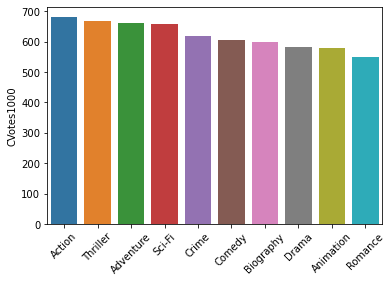

In [62]:
# Bar plot
sns.barplot( data=genre_top10, x=genre_top10.index , y="CVotes1000")
plt.xticks(rotation=45)
plt.show()

**Inference:**

- Our top 1000 IMDb voters seem to like **Action** movies the most, followed by **Thrillers**. **Romantic** movies are the least voted for!